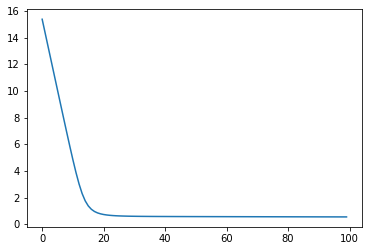

In [2]:
#Written by Jacob Clarke
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt



def normalize(df):
    length = len(df)
    columns = df.columns
    col_length = len(columns)
    
    
    for i in range(col_length):

        _range = 0
        _sum = 0
        _min = 0
        _max = 0
        for j in range(length):
            _sum = df.iloc[j,i] + _sum

            if j == 0:
                _min = _max = df.iloc[j,i]
            if df.iloc[j,i] > _max:
                _max = df.iloc[j,i]
            if df.iloc[j,i] < _min:
                _min = df.iloc[j,i]
            if j == length-1:
                _range = _max - _min
        if _range > 1:

            for j in range(length):
                df.iloc[j,i] = df.iloc[j,i]/_range
        #end if _range
    return
#end normalization

def calculate_h_x(X_i,params):
    length = len(X_i) - 1
    temp = 0
    
    for i in range(length):
        temp = temp + (X_i[i] * params[i])
    
    temp = 1 / (1 + (math.e)**(-1 * temp))
    return temp

def calculate_loss(X,y,params):
    n = y.size
    temp = 0
    for i in range(n):
        
        if calculate_h_x(X.loc[i],params) != 0:
            a = math.log2(calculate_h_x(X.loc[i],params))
        else:
            a = 0
        if calculate_h_x(X.loc[i],params) != 1:
            b = math.log2(1 - calculate_h_x(X.loc[i],params))
        else:
            b = 0
        
        temp = temp + (y[i] * a) + ( (1-y[i]) * b)
    temp = temp * (-1/n)
    return temp

def gradient_descent(X,y,alpha,T):
    normalize(X)
    n = y.size
    columns = X.columns
    col_length = len(columns)
    theta = []
    loss = []
    for i in range(col_length):
        theta.append(1)
    
    for i in range(T):
        loss.append(calculate_loss(X,y,theta))

        for j in range(col_length):

            temp = 0
            for k in range(n):
                temp = temp + (calculate_h_x(X.loc[k],theta) - y[k])*X.iloc[k,j]
            #end for k
            theta[j] = theta[j] - ((1/n)*alpha*temp)
        #end for j
    #end for i
    
    return loss
            
df = pd.read_csv('wdbc.data', header=None) 
df = df[:50]
base_names = ['radius','texture','perimeter','area','smooth','compact','concav', 'conpoints','symmetry','fracdim']
names = ['m'+ name for name in base_names]
names += ['s' + name for name in base_names]
names += ['e' + name for name in base_names]
names = ['id', 'class'] + names
df.columns = names

y = pd.Series([(0 if x== 'M' else 1) for x in df['class']])
x = df.drop(['class'], axis = 1)

cost = gradient_descent(x,y,.1,100)
it = []
for i in range(len(cost)):
    it.append(i)

    
plt.plot(it,cost)

